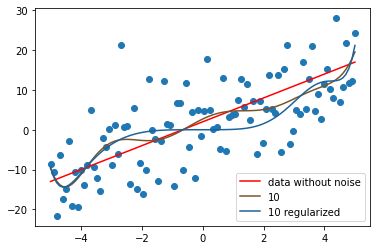

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


# ridge regression
def tikhonovRegularizedLeastSquares(x,y,alpha):
    # x mxn where m is number of samples and n is number of params
    # y mx1
    # theta nx1 is the params
    # y=np.dot(x, theta)
    # if alpha is very large we care more about reducing parameter magnitude than reducing mean square error,
    # alpha -> inf theta -> 0
    # it reduce the variance but it will increase the bias
    n=x.shape[1]
    x_t=np.transpose(x)
    theta=np.dot(np.dot(np.linalg.inv(np.dot(x_t, x)+alpha*np.eye(n)), x_t),y)
    return theta

def xPolynominalExtender(x,PolynominalOrder=1 ):
    number_of_rows=x.shape[0]
    number_of_cols=PolynominalOrder+1
    new_x=np.ones((number_of_rows,number_of_cols))
    for n in range(PolynominalOrder,0,-1):
        #print(n)
        new_x[ :,PolynominalOrder-n] =np.power(x[:,0],n)
    return new_x

# coefficients[0]*x^n + coefficients[1]*x^(n-1) + coefficients[2]*x^(n-2)
def polynominalFunction(x,coefficients):
    y=np.zeros_like(x)
    #print(x.shape)
    #print(y.shape)
    for n in range(len(coefficients)):
        y=y+np.power(x, n)* coefficients[-n-1]
    return y



def pseudoInverseSolver(x,y):
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x), x)), np.transpose(x)), y)


noise_magnitude=8
number_of_samples=100
x_min=-5
x_max=5
m=3
b=2

x= np.linspace(x_min,x_max, number_of_samples  )
x= np.reshape(x,(x.shape[0],-1))

y= polynominalFunction(x,[m,b])
y =y +noise_magnitude*np.random.randn(number_of_samples,1)
plt.scatter(x,y)
actual_y=polynominalFunction(x,[m,b])

labels=[]
data_without_noise, =plt.plot(x,actual_y,color='r',label='data without noise' )
labels.append(data_without_noise)

regularization_alpha = 20000

for i in range(10,11):
    polynominal_order=i
    new_x=xPolynominalExtender(x,polynominal_order )

    params=pseudoInverseSolver(new_x,y)
    y = polynominalFunction(x, params)
    random_color = list(np.random.random(3))
    params_label, = plt.plot(x, y, color=random_color, label=str(i))
    labels.append(params_label)



    regularized_params=tikhonovRegularizedLeastSquares(new_x, y, regularization_alpha)
    y_regularized = polynominalFunction(x, regularized_params)
    random_color = list(np.random.random(3))
    regularized_params_label,=plt.plot(x, y_regularized, color=random_color,label=str(i)+' regularized')
    labels.append(regularized_params_label)

    #print('diff between params and regularized params:',params-regularized_params)

plt.legend(handles=labels)
plt.show()

### Overfitting
Accuracy on test data based on epoch

Cost on the test data

Accuracy on training data based on epoch

Cost on training data

Once the classification accuracy on the validation_data has
saturated, we stop training. This strategy is called early stopping. Of course, in practice we
won’t immediately know when the accuracy has saturated. Instead, we continue training
until we’re confident that the accuracy has saturated.

one of the best ways of reducing overfitting is to
increase the size of the training data. With enough training data it is difficult for even a very
large network to overfit. 


One possible approach is to reduce the size of our network. However, large networks have the potential to be more
powerful than small networks, and so this is an option we’d only adopt reluctantly.

### Validation and Test 
use the validation data to evaluate different trial choices of hyper-parameters such as the number of epochs to train for, the learning rate, the best network architecture, and so on.

once we’ve got the hyper-parameters
we want, we do a final evaluation of accuracy using the test_data. That gives us confidence
that our results on the test_data are a true measure of how well our neural network generalizes. 


## Regularization
models with a large number of free parameters can describe
an amazingly wide range of phenomena. Even if such a model agrees well with the available
data, that doesn’t make it a good model. It may just mean there’s enough freedom in the
model that it can describe almost any data set of the given size, without capturing any
genuine insights into the underlying phenomenon. When that happens the model will work
well for the existing data, but will fail to generalize to new situations.


### Linear least squares
$X_{m\times n}{\vec {\beta_{n\times 1} }}=Y_{m\times 1}$

${\displaystyle L(D,{\vec {\beta }})=||X{\vec {\beta }}-Y||^{2}=(X{\vec {\beta }}-Y)^{T}(X{\vec {\beta }}-Y)=Y^{T}Y-Y^{T}X{\vec {\beta }}-{\vec {\beta }}^{T}X^{T}Y+{\vec {\beta }}^{T}X^{T}X{\vec {\beta }}}$


${\displaystyle {\frac {\partial L(D,{\vec {\beta }})}{\partial {\vec {\beta }}}}={\frac {\partial \left(Y^{T}Y-Y^{T}X{\vec {\beta }}-{\vec {\beta }}^{T}X^{T}Y+{\vec {\beta }}^{T}X^{T}X{\vec {\beta }}\right)}{\partial {\vec {\beta }}}}=-2X^{T}Y+2X^{T}X{\vec {\beta }}}$


setting the gradient of the loss to zero and solving for ${\displaystyle {\vec {\beta }}}$ we get: 

${\displaystyle -2X^{T}Y+2X^{T}X{\vec {\beta }}=0\Rightarrow X^{T}Y=X^{T}X{\vec {\beta }}\Rightarrow {\vec {\hat {\beta }}}=(X^{T}X)^{-1}X^{T}Y}{\displaystyle -2X^{T}Y+2X^{T}X{\vec {\beta }}=0\Rightarrow X^{T}Y=X^{T}X{\vec {\beta }}\Rightarrow {\vec {\hat {\beta }}}=(X^{T}X)^{-1}X^{T}Y}$


### Tikhonov regularization (ridge regression) with L2 norm
We add the magnitude of $\beta$ to our cost to plenalize huge weights and keep the weights small (close to zero)  and all other things being equal. 

${\displaystyle {\hat {\beta }}_{R}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} +\lambda \mathbf {I} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y} }$

$\begin{eqnarray} C = -\frac{1}{n} \sum_{xj} \left[ y_j \ln a^L_j+(1-y_j) \ln
(1-a^L_j)\right] + \frac{\lambda}{2n} \sum_w w^2.
\end{eqnarray}$

The first term is the cross-entropy and the second term, is the squares of all the weights in the network. 


$\begin{eqnarray} C = \frac{1}{2n} \sum_x \|y-a^L\|^2 +
  \frac{\lambda}{2n} \sum_w w^2.
\end{eqnarray}$

n both cases we can write the regularized cost function as:

$\begin{eqnarray}  C = C_0 + \frac{\lambda}{2n}
\sum_w w^2,
\end{eqnarray}$

$C_0$ is the original, unregularized cost function.

$\lambda$: when $\lambda$ is small we prefer to minimize the original cost function, but when $\lambda$ is
large we prefer small weights.

$\begin{eqnarray}
b_{new} = b -\eta \frac{\partial C_0}{\partial b}.
\end{eqnarray}$

$\begin{eqnarray} 
  w_{new}= & & w-\eta \frac{\partial C_0}{\partial
    w}-\frac{\eta \lambda}{n} w   & = & \left(1-\frac{\eta \lambda}{n}\right) w -\eta \frac{\partial
    C_0}{\partial w}. 
\end{eqnarray}$

For stochastic gradient descent we can estimate $\partial C_0 / \partial w$ by averaging over a mini-batch of m training examples. Thus the regularized learning rule for stochastic gradient descent becomes:

$\begin{eqnarray} 
  w_{new}= \left(1-\frac{\eta \lambda}{n}\right) w -\frac{\eta}{m}
  \sum_x \frac{\partial C_x}{\partial w}, 
\end{eqnarray}$

$\begin{eqnarray}
  b_{new} = b - \frac{\eta}{m} \sum_x \frac{\partial C_x}{\partial b},
\end{eqnarray}$


$n$ is, as usual, the size of our training set

$m$ is size of the mini-batch training examples


Heuristically, if the cost function is unregularized, then the length of the weight vector is likely to grow, all other things being equal. Over time this can lead to the weight vector being very large indeed. This can cause the weight vector to get stuck pointing in more or less the same direction, since changes due to gradient descent only make tiny changes to the direction, when the length is long, which is making it hard for our learning algorithm to properly explore the weight space, and consequently harder to find good minima of the cost function.


## Advanced Regularization
[1](https://www.youtube.com/watch?v=ATo7vnzy5sY)

### Lasso method with L1 norm

## Bias Variance tradeoff

Refs: [1](https://www.youtube.com/watch?v=iuJgyiS7BKM), [2](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff), [3](https://www.youtube.com/watch?v=lpkSGTT8uMg)

List of optimisers:
[1](https://github.com/jettify/pytorch-optimizer)

mask r cnn

mesh r cnn

log-likelihood

elastic distortions

https://www.youtube.com/watch?v=dJYGatp4SvA&list=PL5-TkQAfAZFbzxjBHtzdVCWE0Zbhomg7r

https://github.com/facebookresearch/pytorch3d